# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [146]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [147]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
temp = []
humidity = []
cloudPercent = []
windSpeed = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

610

In [103]:
cities

['menongue',
 'parana',
 'severo-kurilsk',
 'rocha',
 'akureyri',
 'rio grande',
 'mataura',
 'punta arenas',
 'makung',
 'goycay',
 'yellowknife',
 'yatou',
 'amderma',
 'kapaa',
 'dunedin',
 'cradock',
 'khatanga',
 'tuatapere',
 'kerteh',
 'irkutsk',
 'port lincoln',
 'taolanaro',
 'atuona',
 'dali',
 'rikitea',
 'port elizabeth',
 'gornyatskiy',
 'hualmay',
 'murowana goslina',
 'hasaki',
 'hambantota',
 'barentsburg',
 'cidreira',
 'lavrentiya',
 'mount gambier',
 'busselton',
 'gennep',
 'shelburne',
 'ratoath',
 'mahebourg',
 'ndele',
 'faya',
 'yerbogachen',
 'iqaluit',
 'aksay',
 'saldanha',
 'mazatlan',
 'norman wells',
 'fort nelson',
 'zyryanka',
 'albany',
 'chiredzi',
 'ushuaia',
 'cherskiy',
 'upernavik',
 'sao joao da barra',
 'cape town',
 'ishinomaki',
 'nalut',
 'lokosovo',
 'hermanus',
 'carnarvon',
 'vostok',
 'kisangani',
 'hithadhoo',
 'orumiyeh',
 'bredasdorp',
 'nikolskoye',
 'elizabeth city',
 'tura',
 'saskylakh',
 'butaritari',
 'inirida',
 'maiduguri',
 'co

In [107]:
weather_df = pd.DataFrame(cities).rename(columns={0: "City"})
weather_df.head()

,City
0,menongue
1,parana
2,severo-kurilsk
3,rocha
4,akureyri


In [110]:
params = {
    "appid": weather_api_key,
    "units": "imperial"
}
weatherUrl = "http://api.openweathermap.org/data/2.5/weather?"
for index,row in weather_df.iterrows():
    city = row["City"]
    params["q"] = city
    print(f"Processing Record {index} | {city}")
    loopResponse = requests.get(weatherUrl, params=params).json()
    
    try:
        weather_df.loc[index, "Latitude"] = loopResponse['coord']['lat']
        weather_df.loc[index, "Longitude"] = loopResponse['coord']['lon']
        weather_df.loc[index, "Temperature"] = loopResponse['main']['temp']
        weather_df.loc[index, "Humidity"] = loopResponse['main']['humidity']
        weather_df.loc[index, "Cloudiness"] = loopResponse['clouds']['all']
        weather_df.loc[index, "Wind Speed"] = loopResponse['wind']['speed']
        weather_df.loc[index, "Country"] = loopResponse['sys']['country']
        weather_df.loc[index, "Date"] = loopResponse['dt']
        
    except KeyError:
        print("Missing Field... Skipping")

Processing Record 0 | menongue
Processing Record 1 | parana
Processing Record 2 | severo-kurilsk
Processing Record 3 | rocha
Processing Record 4 | akureyri
Processing Record 5 | rio grande
Processing Record 6 | mataura
Processing Record 7 | punta arenas
Processing Record 8 | makung
Missing Field... Skipping
Processing Record 9 | goycay
Missing Field... Skipping
Processing Record 10 | yellowknife
Processing Record 11 | yatou
Processing Record 12 | amderma
Missing Field... Skipping
Processing Record 13 | kapaa
Processing Record 14 | dunedin
Processing Record 15 | cradock
Processing Record 16 | khatanga
Processing Record 17 | tuatapere
Processing Record 18 | kerteh
Missing Field... Skipping
Processing Record 19 | irkutsk
Processing Record 20 | port lincoln
Processing Record 21 | taolanaro
Missing Field... Skipping
Processing Record 22 | atuona
Processing Record 23 | dali
Processing Record 24 | rikitea
Processing Record 25 | port elizabeth
Processing Record 26 | gornyatskiy
Processing Reco

Processing Record 233 | verkhnyaya inta
Processing Record 234 | asau
Processing Record 235 | santiago del estero
Processing Record 236 | kaitangata
Processing Record 237 | kipushi
Processing Record 238 | buta
Processing Record 239 | hinton
Processing Record 240 | grand river south east
Missing Field... Skipping
Processing Record 241 | pitimbu
Processing Record 242 | aksu
Processing Record 243 | touros
Processing Record 244 | alofi
Processing Record 245 | vila velha
Processing Record 246 | bambous virieux
Processing Record 247 | nuevo progreso
Processing Record 248 | lesnoye
Processing Record 249 | sentyabrskiy
Missing Field... Skipping
Processing Record 250 | hurghada
Processing Record 251 | qasigiannguit
Processing Record 252 | baruun-urt
Processing Record 253 | high prairie
Processing Record 254 | lazaro cardenas
Processing Record 255 | bambanglipuro
Processing Record 256 | unai
Processing Record 257 | ilulissat
Processing Record 258 | mezen
Processing Record 259 | clyde river
Proces

Processing Record 462 | ulladulla
Processing Record 463 | polonnaruwa
Processing Record 464 | alcaniz
Processing Record 465 | bom jesus da lapa
Processing Record 466 | erzin
Processing Record 467 | buchanan
Processing Record 468 | barda
Processing Record 469 | faanui
Processing Record 470 | tazovskiy
Processing Record 471 | nizhneudinsk
Processing Record 472 | tuban
Processing Record 473 | yar-sale
Processing Record 474 | san luis
Processing Record 475 | sao felix do xingu
Processing Record 476 | manzhouli
Processing Record 477 | fomboni
Processing Record 478 | hobyo
Processing Record 479 | nuuk
Processing Record 480 | berzasca
Processing Record 481 | macau
Processing Record 482 | ouallam
Processing Record 483 | vetlanda
Processing Record 484 | cape girardeau
Processing Record 485 | ilhabela
Processing Record 486 | kawalu
Processing Record 487 | mnogovershinnyy
Processing Record 488 | mapiripan
Processing Record 489 | karousades
Missing Field... Skipping
Processing Record 490 | tagusao

In [111]:
weather_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,menongue,-14.66,17.69,65.10,82.0,95.0,4.14,AO,1.604119e+09
1,parana,-31.73,-60.52,52.52,77.0,0.0,6.93,AR,1.604119e+09
2,severo-kurilsk,50.68,156.12,40.42,91.0,100.0,38.27,RU,1.604119e+09
3,rocha,-34.48,-54.33,43.84,91.0,42.0,1.36,UY,1.604119e+09
4,akureyri,65.68,-18.09,42.80,79.0,20.0,12.75,IS,1.604119e+09
...,...,...,...,...,...,...,...,...,...
614,bossangoa,6.49,17.46,69.49,92.0,46.0,2.59,CF,1.604119e+09
615,demba,-5.51,22.27,68.41,93.0,50.0,1.23,CD,1.604119e+09
616,obo,5.40,26.49,69.42,94.0,92.0,1.77,CF,1.604119e+09
617,kimbe,-5.55,150.14,81.19,81.0,94.0,0.92,PG,1.604119e+09


In [120]:
clean_city_data_df = weather_df.loc[weather_df["Humidity"] <= 100,:]
clean_city_data_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,menongue,-14.66,17.69,65.10,82.0,95.0,4.14,AO,1.604119e+09
1,parana,-31.73,-60.52,52.52,77.0,0.0,6.93,AR,1.604119e+09
2,severo-kurilsk,50.68,156.12,40.42,91.0,100.0,38.27,RU,1.604119e+09
3,rocha,-34.48,-54.33,43.84,91.0,42.0,1.36,UY,1.604119e+09
4,akureyri,65.68,-18.09,42.80,79.0,20.0,12.75,IS,1.604119e+09
...,...,...,...,...,...,...,...,...,...
614,bossangoa,6.49,17.46,69.49,92.0,46.0,2.59,CF,1.604119e+09
615,demba,-5.51,22.27,68.41,93.0,50.0,1.23,CD,1.604119e+09
616,obo,5.40,26.49,69.42,94.0,92.0,1.77,CF,1.604119e+09
617,kimbe,-5.55,150.14,81.19,81.0,94.0,0.92,PG,1.604119e+09


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

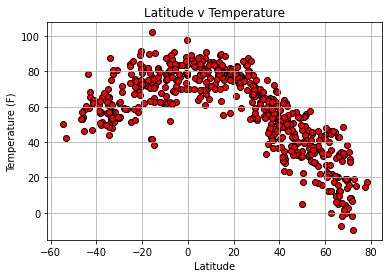

In [137]:
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Temperature"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

## Latitude vs. Humidity Plot

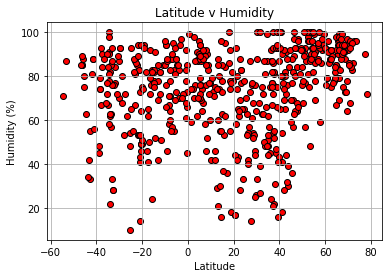

In [138]:
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Temperature"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

## Latitude vs. Cloudiness Plot

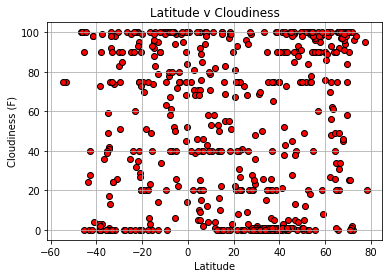

In [139]:
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (F)")
plt.grid(True)

## Latitude vs. Wind Speed Plot

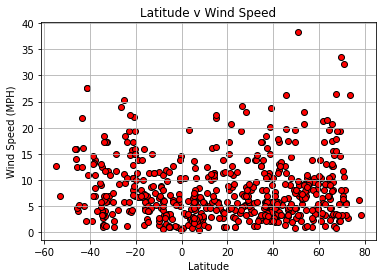

In [140]:
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7880554295839773


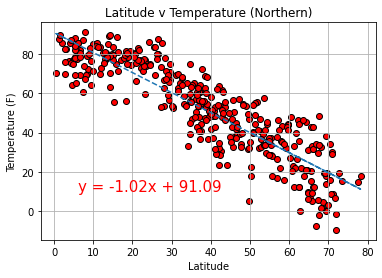

In [172]:
NHcity_data_df = clean_city_data_df.loc[clean_city_data_df["Latitude"] >= 0,:]
plt.scatter(NHcity_data_df["Latitude"], NHcity_data_df["Temperature"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Temperature (Northern)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(NHcity_data_df["Latitude"], NHcity_data_df["Temperature"])
vc_fit = slope * NHcity_data_df["Latitude"] + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(NHcity_data_df["Latitude"],vc_fit,"--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3499100346121694


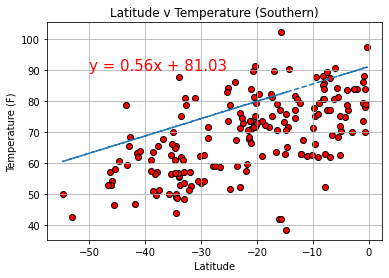

In [173]:
SHcity_data_df = clean_city_data_df.loc[clean_city_data_df["Latitude"] <= 0,:]
plt.scatter(SHcity_data_df["Latitude"], SHcity_data_df["Temperature"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Temperature (Southern)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(SHcity_data_df["Latitude"], SHcity_data_df["Temperature"])
vc_fit = slope * SHcity_data_df["Latitude"] + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SHcity_data_df["Latitude"],vc_fit,"--")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10352869632099523


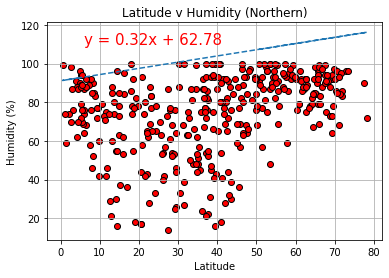

In [174]:
NHcity_data_df = clean_city_data_df.loc[clean_city_data_df["Latitude"] >= 0,:]
plt.scatter(NHcity_data_df["Latitude"], NHcity_data_df["Humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Humidity (Northern)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(NHcity_data_df["Latitude"], NHcity_data_df["Humidity"])
vc_fit = slope * NHcity_data_df["Latitude"] + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(NHcity_data_df["Latitude"],vc_fit,"--")
plt.annotate(line_eq,(6,110),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004273728347638578


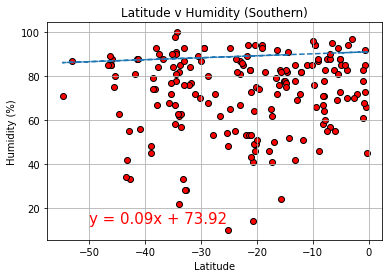

In [177]:
SHcity_data_df = clean_city_data_df.loc[clean_city_data_df["Latitude"] <= 0,:]
plt.scatter(SHcity_data_df["Latitude"], SHcity_data_df["Humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Humidity (Southern)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(SHcity_data_df["Latitude"], SHcity_data_df["Humidity"])
vc_fit = slope * SHcity_data_df["Latitude"] + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SHcity_data_df["Latitude"],vc_fit,"--")
plt.annotate(line_eq,(-50,13),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


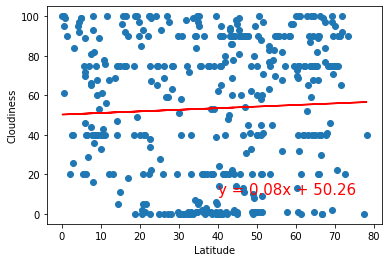

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


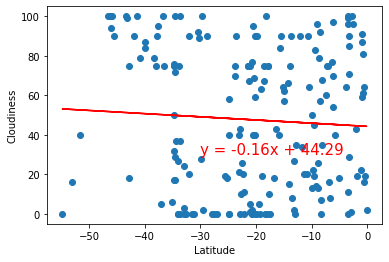

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


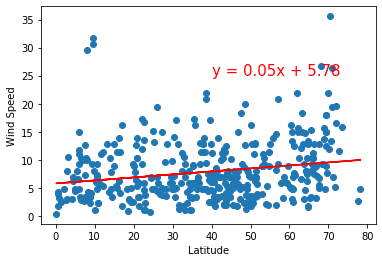

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


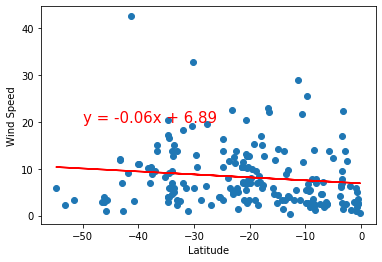